<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

#  Análisis de Componentes Principales. Fundamentos Teóricos.

Este *cuaderno* trata sobre el Análisis de Componentes Principales y sobre la manera en que se puede utilizarlos para reducir la dimensionalidad de datos. El objetivo del *cuaderno* es que aprenda que son los componentes principales, que reconozca las características y el funcionamiento del algoritmo de componentes principales, y a construir e implementar este algoritmo.

**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

Los grandes conjuntos de datos son cada vez más comunes y, a menudo, difíciles de interpretar. Para hacerlo, se requieren métodos que permitan reducir drásticamente su dimensionalidad de una manera interpretable, de modo que se conserve la mayor parte de la información de los datos.

El análisis de componentes principales, o PCA por sus siglas en inglés, es una técnica de aprendizaje no supervisado que permite reducir la dimensionalidad de tales conjuntos de datos, aumentando la interpretabilidad, pero al mismo tiempo minimizando la pérdida de información. Se han desarrollado muchas técnicas para este propósito, pero el análisis de componentes principales es uno de los más antiguos y más utilizados. Su idea es simple: reducir la dimensionalidad de un conjunto de datos, mientras se preserva la mayor "variabilidad"  posible.

A modo de ejemplo, supongamos que disponemos de una base de datos de 100 clientes de un banco que cuenta con información sobre 10 variables que miden riesgo crediticio de los clientes. Estas variables contienen información sobre transacciones bancarias, historia crediticia, entre otras. La pregunta que queremos responder es si es posible construir una suerte de índice que permita condensar todas estas dimensiones en una sola que resuma el riesgo crediticio.

La primer respuesta obvia sería construir un índice compuesto por el promedio de estas 10 variables. Sin embargo, todas estas variables pueden contener información redundante o no tener la misma importancia. El problema entonces se puede pensar como cuál es la mejor forma de
construir este índice combinando linealmente estas variables.




## ¿Qué son los componentes principales?


Supongamos que queremos visualizar $n$ observaciones de las cuales tenemos $k$ variables o atributos, representadas por $x_1,x_2,\dots,x_k$ como parte de un análisis descriptivo. Siguiendo el ejemplo anterior, $n$ serian los 100 clientes y $k$ las 10 variables que miden el riesgo crediticio. Una forma de hacer el análisis descriptivo es haciendo diagramas de dispersión para las $n$ observaciones examinando dos variables por vez. El problema acá se hace evidente, si tenemos 10 variables tendríamos que examinar 45 gráficas $\left(\left(\begin{array}{c}
10\\
2
\end{array}\right)=\frac{10\times9}{2}=45\right)$

Si $k$ es muy grande, como suele serlo en estas aplicaciones, sería imposible examinar todas las gráficas. Necesitamos un método que nos permita visualizar cuando la dimensión $k$ es muy grande. El análisis de componentes principales es una herramienta que nos permite alcanzar este objetivo.

Intuitivamente, PCA plantea que cada observación se encuentra en un espacio $k-dimensional$, pero en el que no todas estas dimensiones son igualmente informativas. Por lo tanto, PCA busca representar los datos en un espacio de menor dimensión, reteniendo la mayor cantidad de información posible. Entonces estas nuevas dimensiones encontradas por PCA, llamadas componentes, es una combinación lineal de las variables originales.

El primer componente de un conjunto de variables $X_1,X_2,\dots,X_k$ es

\begin{align}
f_1= \delta_{11} x_1+ \delta_{12} x_2 + \dots + \delta_{1k} x_k
\end{align}

Donde $f_1$ denota al primer componente principal y los $\delta_{ij}$ se conocen como pesos o *loadings* del primer componente principal. Esta ecuación ilustra también el hecho de que el primer componente principal es una combinación lineal de las variables originales. La pregunta que naturalmente surge es: ¿Cómo se calculan estos componentes de forma tal que preserven la mayor información posible?


## Cálculo de los componentes

### Cálculo del primer componente


Formalmente, supongamos que $X$ es una matriz $n \times k$ que contiene los datos, es decir, las $n$ observaciones de las $k$ variables. Asumimos que cada una de las variables en $X$ están centradas para tener media cero. La matriz $X$, a su vez, tiene una matriz de covarianza asociada denotada con $S=Var(X)$, que por definición es una matriz cuadrada de orden $k$. 

La tarea del primer componente principal es encontrar la combinación lineal de las variables originales que maximiza la varianza, es decir, preservan la mayor información posible. El objetivo es crear un índice $f_1$ que tiene la siguiente forma:

\begin{align}
f_1 &= X \delta'_1 \\
    &= \delta_{11} x_1+ \delta_{12} x_2 + \dots + \delta_{1k} x_k
\end{align}

en donde $\delta_1$ es un vector de $k$ números reales $(\delta_1= \delta_{11},\dots, \delta_{1k})$. El problema consiste en elegir $\delta_1$ óptimamente, ya que este indice va a ser la "mejor" combinación lineal de $x_1, x_2, \dots, x_k$. Definimos como "mejor" a aquella combinación lineal que maximiza la varianza. Dicho de otra forma, vamos a buscar maximizar la varianza de forma tal que podamos reproducir de la mejor manera posible la variabilidad (información) original de las variables $x_j$.

Notando que

\begin{align}
Var(f_1) &= Var(X \delta'_1) \\
       &= \delta_1 Var(X ) \delta'_1 \\
       &= \delta_1 S \delta'_1 
\end{align}

el problema se reduce a elegir $\delta_1$ de forma que maximice $Var(X \delta_1)$. Maximizar $\delta_1 S \delta'_1$ tiene como solución trivial llevar $\delta_1$ a infinito $(\delta_1 \rightarrow \infty)$. Para que esta maximización tenga solución en la practica se impone una restricción adicional que normaliza $\delta_1$:

\begin{align}
\delta_1\delta'_1=1
\end{align}

Esto restringe a que la suma del cuadrado de los  pesos o *loadings* sean igual a uno, ya que si lo restringimos a que sea un número arbitrariamente grande esto podría resultar en una varianza arbitrariamente grande. 

El problema queda definido de la siguiente manera:

\begin{align}
\underset{\delta_1}{max}\,\, \delta_1 S \delta'_1 \\ 
\text{sujeto a}  \\ 
\delta_1 \delta'_1 = 1 
\end{align}

maximiza $\delta_1 S \delta'_1$ restringiendo que $\delta_1\delta'_1=1$. Escribiendo el Lagrangiano,

\begin{align}
\mathcal{L} = \delta_1 S \delta'_1 + \lambda_1 (1-\delta_1\delta'_1)
\end{align}

y maximizamos esta expresión de la forma habitual derivando respecto a $\delta_1$ e igualando a cero:

\begin{align}
\frac{\partial \mathcal{L}}{\partial \delta_1}=S \delta'_1 - \lambda_1 \delta'_1 =0
\end{align}

Reordenando: 

\begin{align}
S \delta'_1 = \lambda_1 \delta'_1
\end{align}

En el óptimo, $\delta_1$ es el eigenvector correspondiente al eigenvalor $\lambda$. Pre multiplicando la ecuación anterior por $\delta_1$ y usando la restricción $\delta_1\delta'_1=1$:

\begin{align}
\delta_1 S \delta'_1 = \lambda_1 
\end{align}

para maximizar $\delta_1 S \delta'_1$ debemos elegir $\lambda_1$ igual al máximo eigenvalor de $S$ y $\delta_1$ igual al eigenvalor correspondiente. Notando además que $\delta_1 S \delta'_1=Var(X \delta'_1)$, el problema de encontrar la mejor combinación lineal que reproduce la variabilidad en $X$ se reduce a encontrar el mayor eigenvalor de $S$ y su correspondiente eigenvector.


#### Ejemplo cálculo primer componente

Ilustremos en detalle el cálculo del primer componente principal en `Python` utilizando datos de la  
[Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph), realizada por el DANE en 2017. El archivo `gasto_col_2017_norm.csv` disponible en la carpeta `data`, contiene los gastos individuales promedios estandarizados en Salud, Transporte, y Educación para 38 ciudades colombianas.

In [1]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np


# Cargamos y visualizamos la primeras observaciones de los datos
gasto = pd.read_csv('data/gasto_col_2017_norm.csv')
gasto = gasto.set_index("Ciudad")
gasto.head()

,Salud,Transporte,Educación
Ciudad,,,
Arauca,-0.125062,-1.344088,-1.028321
Armenia,0.434314,0.691669,0.528711
Barrancabermeja,-0.752697,-0.093582,0.966586
Barranquilla,-0.859420,0.275332,0.503810
Bogotá,2.745217,2.313395,3.943969


La matriz de varianzas es:

In [2]:
S = gasto.cov()
S

,Salud,Transporte,Educación
Salud,1.000000,0.687662,0.644640
Transporte,0.687662,1.000000,0.541518
Educación,0.644640,0.541518,1.000000


Los valores propios son las raíces de la ecuación:

$$|S-\lambda I| =0 $$

y los obtenemos en `Python` con:

In [3]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([2.25116235, 0.28709315, 0.4617445 ])

El máximo eigenvalor es el primero y el eigenvector  asociado a este eigenvalor nos dará los pesos o *loadings* del primer componente principal:

In [4]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[0.60164121, 0.57198642, 0.55754766]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  0.60 \times Salud + 0.57 \times Transporte + 0.55 \times Educación
\end{align}

Calculando este componente para cada una de las ciudades tenemos entonces un índice que reduce las tres variables en una:

In [5]:
f1=gasto.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.head()

,CP1
Ciudad,
Arauca,-1.417381
Armenia,0.951708
Barrancabermeja,0.032537
Barranquilla,-0.078678
Bogotá,5.173817


Si ordenamos las ciudades según esta nueva variable construida (PCA), se puede notar que las ciudades quedan prácticamente ordenadas por su ingreso. El primer componente principal entonces esta redescubriendo  el ingreso de estas ciudades.

In [6]:
f1.sort_values(by='CP1', ascending=False).head()

,CP1
Ciudad,
Bogotá,5.173817
Tunja,2.408399
Medellín y A.M.,2.213589
Manizales y A.M.,1.849532
Cali,1.638936


### Cálculo del segundo componente principal

Luego de calcular el primer componente principal $f_1$, podemos encontrar también el segundo componente principal, $f_2$:

\begin{align}
f_2 &= X \delta'_2 \\ 
    &= \delta_{21} x_1+ \delta_{22} x_2 + \dots + \delta_{2k} x_k
\end{align}

El segundo componente principal, será la combinación lineal que tiene la máxima varianza de todas las combinaciones lineales ortogonales a $f_1$. En otras palabras, responde a la pregunta: ¿Cuál es la mejor combinación lineal de las variables $x_1,x_2,\dots,x_k$ no correlacionada al primer componente principal? Intuitivamente, esta es la "segunda mejor" combinación lineal de $x_1,x_2,\dots,x_k$, que no esta contenida en el primer componente. 



El cálculo del segundo componente entonces responde al siguiente problema:

\begin{align}
\underset{\delta_2}{max}\,\, \delta_2 S \delta'_2 \\
\text{sujeto a}   \\
\delta_2 \delta'_2 &= 1  
y \\ 
\delta_2 \delta'_1 &=0 \\ \nonumber
\end{align}


Donde el objetivo a maximizar y la primera restricción son similares al del problema del primer componente. La diferencia surge en la segunda restricción donde imponemos que $\delta_1 \delta'_2  =0$ lo que asegura que los componentes no estén correlacionados (que sean ortogonales). Escribiendo el Lagrangiano,

\begin{align}
\mathcal{L} = \delta_2 S \delta'_2 + \lambda_2 (1-\delta_2\delta'_2 + \lambda_{21} (0-\delta_1 \delta'_2)
\end{align}

y maximizaremos esta expresión de la forma habitual derivando respecto a $\delta_2$ e igualando a cero:

\begin{align}
\frac{\partial \mathcal{L}}{\partial \delta_2}= -2 S \delta'_2 - \lambda_2 2 \delta'_2 - \lambda_{21}\delta'_1=0
\end{align}

Pre multiplicando por $\delta_1$


\begin{align}
     -2 \delta_1 S \delta'_2 - \lambda_2 2 \delta_1 \delta'_2 - \lambda_{21}\delta_1 \delta'_1 = 0
\end{align}

Notemos que $\delta_1 \delta'_1 =1$ por lo tanto $\lambda_{21}=0$, y que $\delta_1 \delta'_2 =0$. Usando estas  ecuaciones tenemos:


\begin{align}
 S \delta'_2 &= \lambda_2 \delta'_2 \\
\delta_2  S \delta'_2 &= \lambda_2 
\end{align}


De forma que $\delta_2$ es un eigenvector de $S$, y puesto que queremos maximizar la varianza, deberíamos elegir el eigenvector asociado al eigenvalue mas grande, pero este ya lo utilizamos para el primer componente. Entonces $\delta_2$  es el eigenvector asociado al segundo eigenvalue mas grande.



Siguiendo esta lógica, por inducción es posible seguir calculando componentes cada uno ortogonal entre si y decrecientes en importancia. En general, para una matriz $X$ con  $n$ observaciones y $k$ variables tiene al menos el mínimo entre el número de observaciones menos 1 $(n-1)$ y el número de variables $(k)$, i.e.  $min(n-1,k)$, componentes principales distintos.


#### Ejemplo cálculo PCA (cont.)

Continuando con el ejemplo anterior, el segundo componente principal es aquel que esta asociado al segundo eigenvalue mayor, que es 0.4617445. 


In [7]:
eig_val

array([2.25116235, 0.28709315, 0.4617445 ])

El eigenvector asociado a este eigenvalue: 

In [8]:
eig_vec[[2]]

array([[-0.10616542, -0.63455599,  0.76555052]])

El segundo componente principal es:

\begin{align}
f_2 =  - 0.10 \times Salud - 0.63 \times Transporte + 0.76 \times Educación
\end{align}

Calculando este para cada una de las ciudades tenemos entonces un índice que reduce las tres variables en una:

In [9]:
f2=gasto.dot(eig_vec[[2]].T) #calculamos f2
f2.columns = ['CP2'] #nombramos la columna del primer componente como CP2
f2.sort_values(by='CP2', ascending=False).head()

,CP2
Ciudad,
Inírida,2.122875
Bogotá,1.259882
Leticia,1.217096
San José del Guaviare,0.911059
Barrancabermeja,0.879264


## Cálculo de componentes principales con `PyPI`


Ahora, vamos a realizar el cálculo de los componentes pricipales utilizando la biblioteca [pca](https://pypi.org/project/pca/) disponible en `PyPI`. Esta biblioteca es una herramienta de análisis de componentes principales que proporciona una interfaz fácil de usar y expande las capacidades que tiene la clase  [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  de la librería [scikit-learn](https://scikit-learn.org/stable/) 



Entonces iniciemos importando la librería:

In [10]:
# Carguemos la librería
from pca import pca

Con la biblioteca `pca` importada, el siguiente paso es inicializar un objeto PCA. La biblioteca `pca` proporciona una clase `pca` que podemos utilizar para este propósito. Una vez que tengamos nuestro objeto PCA, podemos ajustarlo a nuestros datos.

A diferencia de la biblioteca `sklearn`, la biblioteca `pca` combina los pasos de ajuste y transformación en una sola función, lo que simplifica el proceso. Además, esta biblioteca proporciona visualizaciones integradas que nos permiten ver fácilmente los resultados del PCA.

Vamos a inicializar nuestro objeto PCA y ajustarlo a nuestros datos.

In [11]:
# Inicializamos el objeto PCA
model = pca(n_components=2)

In [12]:
# Ajustamos el PCA a nuestros datos 
gasto_pca = model.fit_transform(gasto, verbose=False)
gasto_pca

{'loadings':         Salud  Transporte  Educación
 PC1  0.601641    0.571986   0.557548
 PC2 -0.106165   -0.634556   0.765551,
 'PC':                             PC1       PC2
 Arauca                -1.417381  0.078945
 Armenia                0.951708 -0.080257
 Barrancabermeja        0.032537  0.879264
 Barranquilla          -0.078678  0.302219
 Bogotá                 5.173817  1.259882
 Bucaramanga y A.M.     1.492981 -0.107289
 Buenaventura          -1.092105 -0.603932
 Cali                   1.638936 -0.077733
 Cartagena             -0.178175 -0.598100
 Cúcuta y A.M.         -0.904421 -0.356483
 Florencia             -1.123237 -0.489859
 Ibagué                 0.788397 -0.185930
 Inírida               -0.323544  2.122875
 Leticia               -1.508413  1.217096
 Manizales y A.M.       1.849532 -0.523291
 Medellín y A.M.        2.213589 -0.331666
 Mitú                  -2.368841  0.412880
 Mocoa                 -0.305489  0.149123
 Montería              -1.152566  0.190841
 Neiva 

La función nos retorna entonces los *loadings* y los componentes principales. Notemos que son iguales a los encontrados anteriormente.

La biblioteca `pca` proporciona varias funcionalidades extras. Entre ellas la función `biplot` que nos permite visualizar fácilmente los componentes principales y las cargas originales en un solo gráfico. 

Vamos a crear un biplot de nuestros resultados de PCA.

[pca] >Plot PC1 vs PC2 with loadings.


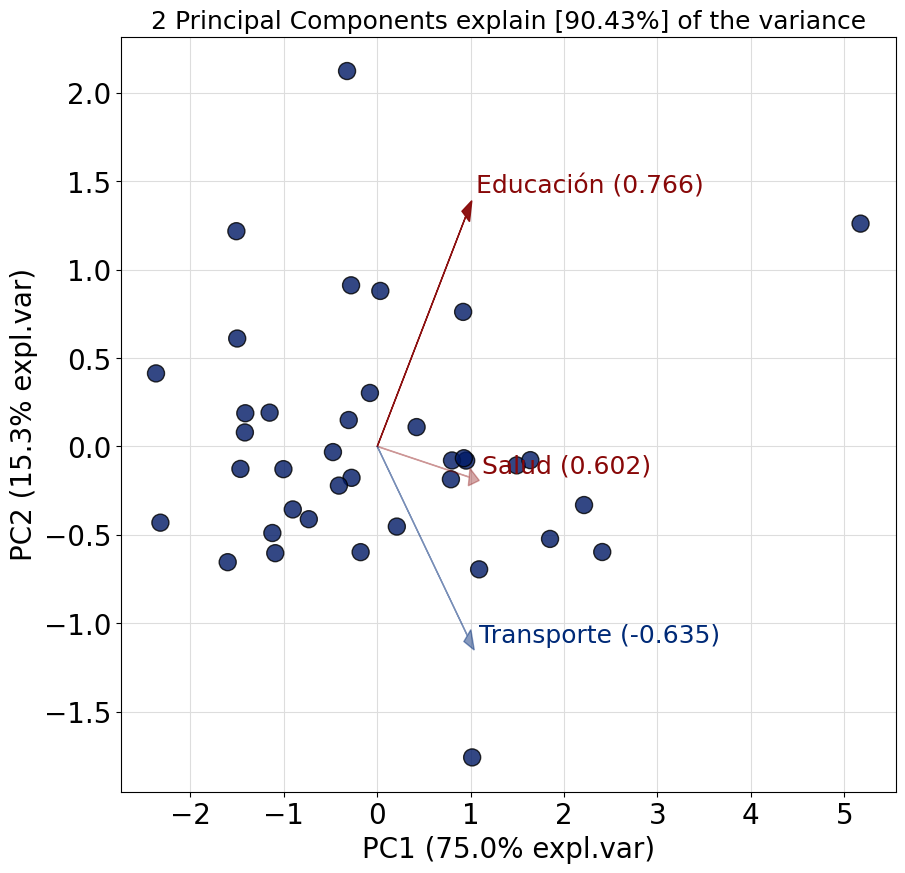

In [13]:
import matplotlib 

# Creamos el biplot
fig, ax = model.biplot(n_feat=3, legend=False, figsize=(10,10))

El biplot anterior muestra los dos primeros componentes principales (PC1 y PC2) en el eje x e y, respectivamente. Las flechas representan los *loadings*  de las variables en estos componentes. La dirección y longitud de las flechas indican cómo cada variable contribuye a los componentes principales.

En este biplot, podemos observar cómo las diferentes variables (representadas por flechas) están relacionadas entre sí y cómo están distribuidas en relación con los dos primeros componentes principales. Las observaciones (puntos) representan las proyecciones de los datos originales en el espacio de los componentes principales.

El biplot es una herramienta poderosa para la interpretación de un PCA, ya que combina información sobre las observaciones y las variables en un solo gráfico. Nos permite entender la estructura subyacente de los datos y cómo las variables contribuyen a la variabilidad capturada por los componentes principales.

Finalmente, hay que mencionar Cabe mencionar que la interpretación de un biplot puede ser un poco compleja, especialmente cuando se trata de conjuntos de datos de alta dimensionalidad. Sin embargo, sigue siendo una herramienta útil para la exploración inicial de datos y la visualización de la estructura subyacente en los datos.

# Referencias


-   Ahumada, H. A., Gabrielli, M. F., Herrera Gomez, M. H., & Sosa
    Escudero, W. (2018). Una nueva econometría: Automatización, big
    data, econometría espacial y estructural.

-   DANE (29 de Septiembre de 2020). Encuesta nacional de presupuestos
    de los hogares (ENPH). Anexos: 32 ciudades y 6 ciudades intermedias.
    <https://www.dane.gov.co/files/investigaciones/boletines/enph/ciudades-enph-2017.xls>

-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics
    for machine learning. Cambridge University Press.

-   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An
    introduction to statistical learning (Vol. 112, p. 18). New York:
    springer.

-   Murphy, K. P. (2012). Machine learning: a probabilistic perspective.
    MIT press.

-   Peña, D. (2002). Análisis de datos multivariantes (Vol. 24). Madrid:
    McGraw-hill.


# Información de Sesión

In [14]:
import session_info


session_info.show(html=False)

-----
matplotlib          3.5.3
numpy               1.18.4
pandas              1.0.3
pca                 2.0.3
session_info        1.0.0
-----
IPython             7.14.0
jupyter_client      6.1.3
jupyter_core        4.6.3
jupyterlab          2.1.1
notebook            6.0.3
-----
Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
Linux-5.15.0-1017-aws-x86_64-with-debian-buster-sid
-----
Session information updated at 2023-08-03 19:43
